In [4]:
# Importa los paquetes
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.parser import parse

In [5]:
# Importa tu dataframe
file_path = "../../data/Cuernavaca_Enero_comas.csv"
df = pd.read_csv(file_path, index_col=0, parse_dates=True)
df.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-01-31 14:00:00', '2012-01-31 15:00:00',
               '2012-01-31 16:00:00', '2012-01-31 17:00:00',
               '2012-01-31 18:00:00', '2012-01-31 19:00:00',
               '2012-01-31 20:00:00', '2012-01-31 21:00:00',
               '2012-01-31 22:00:00', '2012-01-31 23:00:00'],
              dtype='datetime64[ns]', name='tiempo', length=744, freq=None)

(0.0, 800.0)

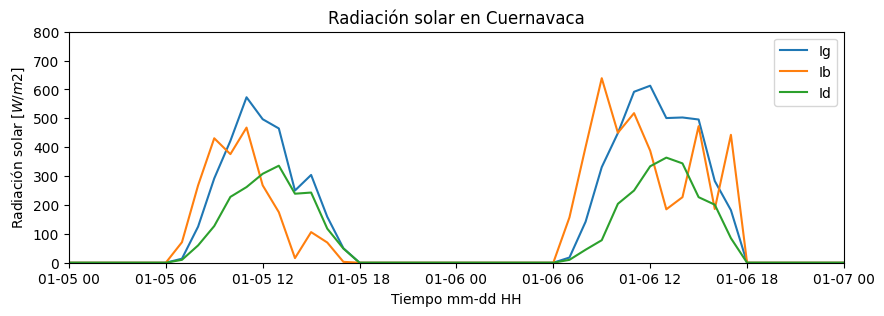

In [6]:
# Grafica usando fig, ax1 
# your code here
# definir figura dimensiones 10x3 pulgadas
fig, ax1 = plt.subplots(figsize=(10,3))

# Graficación serie de datos
ax1.plot(df.Ig, label="Ig")
ax1.plot(df.Ib, label="Ib")
ax1.plot(df.Id, label="Id")

# Añadir leyenda
ax1.legend()

# Ajuste de Límites de Fecha
f1 = pd.Timestamp("2012-01-05")
f2 = pd.Timestamp("2012-01-07")

ax1.set_xlim(f1, f2)

# Configuración de etiquetas y titulo
ax1.set_xlabel("Tiempo mm-dd HH")
ax1.set_ylabel("Radiación solar [$W/m2$]")
ax1.set_title("Radiación solar en Cuernavaca")

# límite de radiación
ax1.set_ylim(0, 800)

In [7]:
cuerna = df
cuerna.head()

,To,RH,P,Ws,Wd,Ig,Ib,Id
tiempo,,,,,,,,
2012-01-01 00:00:00,19.3,58,87415,0.0,26,0,0,0
2012-01-01 01:00:00,18.6,59,87602,0.0,26,0,0,0
2012-01-01 02:00:00,17.9,61,87788,0.0,30,0,0,0
2012-01-01 03:00:00,17.3,66,87554,0.0,30,0,0,0
2012-01-01 04:00:00,16.6,71,87321,0.0,27,0,0,0


<Figure size 1000x300 with 0 Axes>

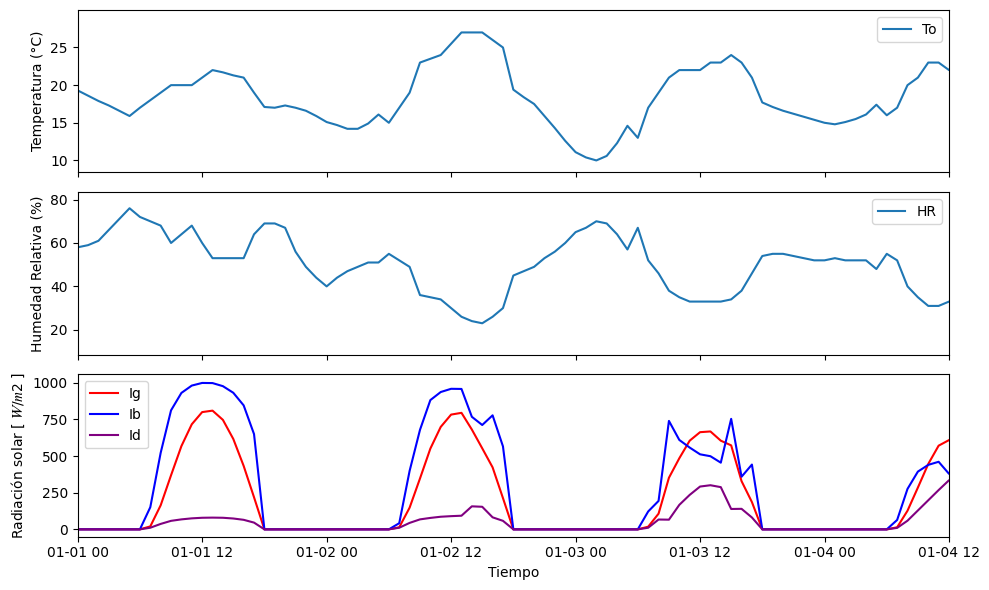

In [23]:
start = pd.Timestamp("2012-01-01")
end = start + pd.Timedelta(days=3.5)

fig = plt.figure(figsize=(10, 3))
fig, ax2 = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Primer subgráfico – Temperatura (To)
ax2[0].plot(cuerna.index, cuerna["To"], label="To")
ax2[0].set_ylabel("Temperatura (°C)")
ax2[0].legend()
ax2[0].set_xlim(start, end)

# Segundo subgráfico – Humedad Relativa (HR)

ax2[1].plot(cuerna.index, cuerna["RH"], label="HR")
ax2[1].set_ylabel("Humedad Relativa (%)")
ax2[1].legend()
ax2[1].set_xlim(start, end)

# Tercer subgráfico – Radiaciones [W/m2]

ax2[2].plot(cuerna.index, cuerna["Ig"], color="red",   label="Ig")
ax2[2].plot(cuerna.index, cuerna["Ib"], color="blue",  label="Ib")
ax2[2].plot(cuerna.index, cuerna["Id"], color="purple",label="Id")
ax2[2].set_ylabel("Radiación solar [ $𝑊/𝑚2$ ]")
ax2[2].set_xlabel("Tiempo")
ax2[2].legend()
ax2[2].set_xlim(start, end)

# Visualización Final
plt.tight_layout()


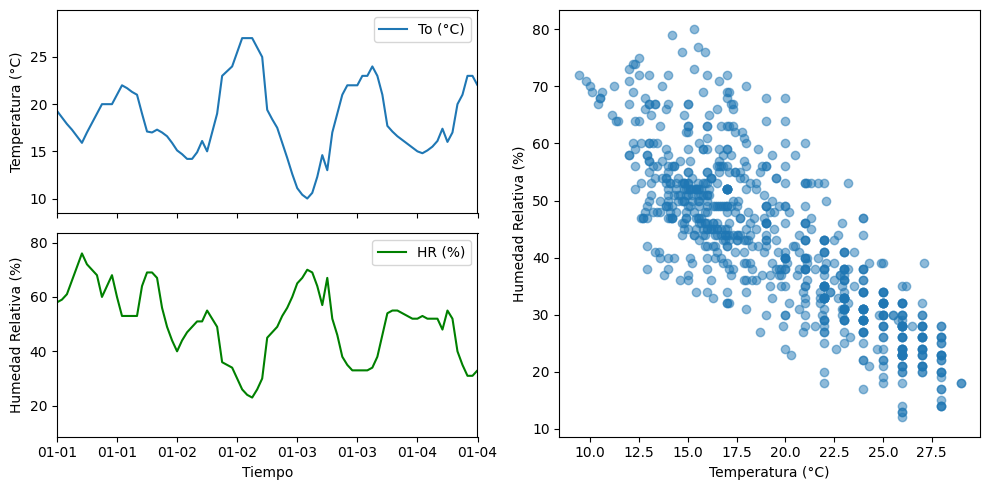

In [8]:
import matplotlib.gridspec as gridspec
from matplotlib.dates import DateFormatter

start = pd.Timestamp("2012-01-01")
end = start + pd.Timedelta(days=3.5)


fig = plt.figure(3, figsize=(10, 5))
gs = gridspec.GridSpec(2, 4)

# Creación de la Figura y Configuración de GridSpec
# Primer subgráfico (ax1): abarca la fila 0, columnas 0 y 1
ax1 = fig.add_subplot(gs[0, 0:2])


#Primer Subgráfico - Temperatura

ax1.plot(cuerna["To"], label="To (°C)")
ax1.set_ylabel("Temperatura (°C)")
ax1.legend()

ax1.set_xlim(start, end)
# ocultar las etiquetas del eje x en ax1
ax1.tick_params(labelbottom=False)

# Segundo subgráfico (ax2): abarca la fila 1, columnas 0 y 1, comparte eje x con ax1
ax2 = fig.add_subplot(gs[1, 0:2], sharex=ax1)
ax2.plot(cuerna.index, cuerna["RH"], color="green", label="HR (%)")
ax2.set_ylabel("Humedad Relativa (%)")
ax2.set_xlabel("Tiempo")
ax2.legend()
ax2.set_xlim(start, end)
ax2.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# Tercer subgráfico (ax3): abarca ambas filas, columna 1
ax3 = fig.add_subplot(gs[:, 2:4])
ax3.scatter(cuerna["To"], cuerna["RH"], alpha=0.5)
ax3.set_xlabel("Temperatura (°C)")
ax3.set_ylabel("Humedad Relativa (%)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Cuernavaca temperatura')

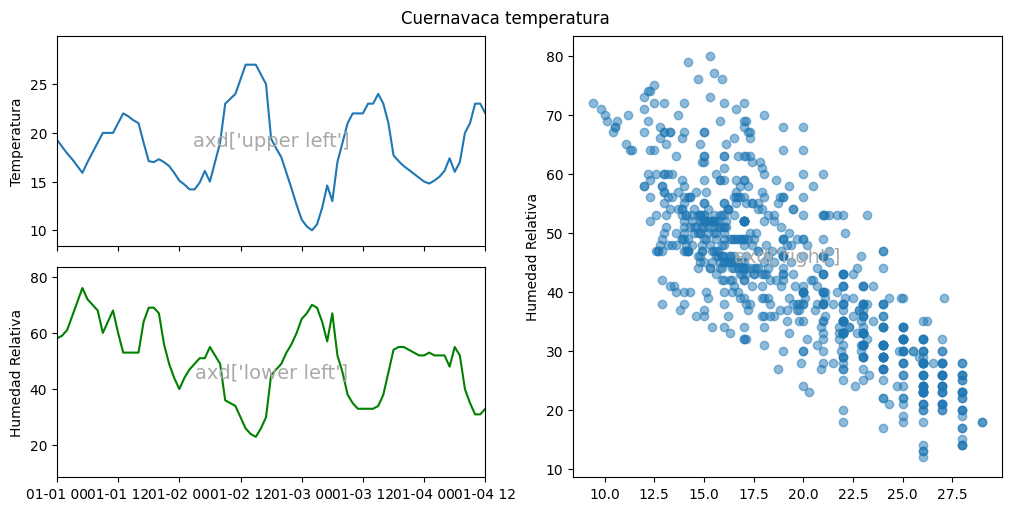

In [16]:
start = pd.Timestamp("2012-01-01")
end = start + pd.Timedelta(days=3.5)

def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")
            

fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 5), layout="constrained")

axd['upper left'].plot(cuerna.To, color="C0")
axd['upper left'].set_ylabel("Temperatura")
axd['upper left'].set_xlim(start, end)
axd['upper left'].tick_params(labelbottom=False)

axd['lower left'].plot(cuerna.RH, color="green")
axd['lower left'].set_ylabel("Humedad Relativa")
axd['lower left'].set_xlim(start, end)

axd['right'].scatter(cuerna["To"], cuerna["RH"], alpha=0.5)
axd['right'].set_ylabel("Humedad Relativa")

for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)

fig.suptitle('Cuernavaca temperatura')